In [1]:
import numpy as np
import matplotlib.pyplot as plt

def fitness(x):
    # Add fitness function here
    return np.sum(x)

def uniform_crossover(p_c, p1, p2):
    # Return children
    if (np.random.random() < p_c):
        ind_len, = p1.shape
        c1 = np.zeros(ind_len)
        c2 = np.zeros(ind_len)
        for i in range(ind_len):
            if (np.random.random() < 0.5):
                c1[i] = p1[i]
                c2[i] = p2[i]
            else:
                c1[i] = p2[i]
                c2[i] = p1[i]
    else:
        c1 = p1.copy()
        c2 = p2.copy()
    return c1, c2

def mutation(p_m, p):
    # Return child
    ind_len, = p.shape
    c = p.copy()
    for i in range(ind_len):
        if (np.random.random() < p_m):
            if (c[i] == 0):
                c[i] = 1
            else:
                c[i] = 0
    return c

def tournament_selection(fitnesses, ts):
    # Return index of selected individual -- random.choice()
    tourn = np.random.choice(range(len(fitnesses)), ts, replace=False)
    tourn_fit = [fitnesses[i] for i in tourn]
    
    return tourn[np.argmax(tourn_fit)]

pop_size = 100
ind_len = 50
p_c = 0.5
p_m = 0.01

# Initialize binary population -- randint
population = np.random.randint(0,2,(pop_size,ind_len))

# Start at generation 0
gen = 0

# Track relevant fitness info (mean and max fitness)
mean_fits = []
max_fits = []

while (gen < 100):
    # Initialize children
    children = np.zeros((pop_size,ind_len))
    
    # Calculate fitnesses
    fitnesses = [fitness(x) for x in population]
    
    # Track relevant fitness info (mean and max fitness)
    mean_fits.append(np.mean(fitnesses))
    max_fits.append(max(fitnesses))
    
    # Print generation info and increment gen
    print("Gen", gen, max(fitnesses))
    gen += 1
    
    # Select parents
    parents = [tournament_selection(fitnesses, 3) for i in range(pop_size)]

    # Create children in pairs
    for i in range(0,pop_size,2):
        c1, c2 = uniform_crossover(p_c, population[parents[i]], population[parents[i+1]])
        c1 = mutation(p_m, c1)
        c2 = mutation(p_m, c2)
        children[i,:] = c1[:]
        children[i+1,:] = c2[:]
        
    # Replace population with children
    population = children

Gen 0 34
Gen 1 34.0
Gen 2 35.0
Gen 3 36.0
Gen 4 37.0
Gen 5 42.0
Gen 6 42.0
Gen 7 43.0
Gen 8 46.0
Gen 9 44.0
Gen 10 46.0
Gen 11 47.0
Gen 12 47.0
Gen 13 48.0
Gen 14 49.0
Gen 15 49.0
Gen 16 49.0
Gen 17 49.0
Gen 18 50.0
Gen 19 50.0
Gen 20 50.0
Gen 21 50.0
Gen 22 50.0
Gen 23 50.0
Gen 24 50.0
Gen 25 50.0
Gen 26 50.0
Gen 27 50.0
Gen 28 50.0
Gen 29 50.0
Gen 30 50.0
Gen 31 50.0
Gen 32 50.0
Gen 33 50.0
Gen 34 50.0
Gen 35 50.0
Gen 36 50.0
Gen 37 50.0
Gen 38 50.0
Gen 39 50.0
Gen 40 50.0
Gen 41 50.0
Gen 42 50.0
Gen 43 50.0
Gen 44 50.0
Gen 45 50.0
Gen 46 50.0
Gen 47 50.0
Gen 48 50.0
Gen 49 50.0
Gen 50 50.0
Gen 51 50.0
Gen 52 50.0
Gen 53 50.0
Gen 54 50.0
Gen 55 50.0
Gen 56 50.0
Gen 57 50.0
Gen 58 50.0
Gen 59 50.0
Gen 60 50.0
Gen 61 50.0
Gen 62 50.0
Gen 63 50.0
Gen 64 50.0
Gen 65 50.0
Gen 66 50.0
Gen 67 50.0
Gen 68 50.0
Gen 69 50.0
Gen 70 50.0
Gen 71 50.0
Gen 72 50.0
Gen 73 50.0
Gen 74 50.0
Gen 75 50.0
Gen 76 50.0
Gen 77 50.0
Gen 78 50.0
Gen 79 50.0
Gen 80 50.0
Gen 81 50.0
Gen 82 50.0
Gen 83 50.0
Gen 

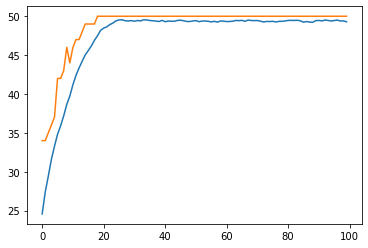

In [2]:
# Plot the fitness info
plt.plot(range(gen), mean_fits)
plt.plot(range(gen), max_fits)